# Análisis de Retención de Clientes en la Industria Bancaria

Este proyecto de análisis de datos se centra en explorar y comprender un conjunto de datos que contiene información sobre clientes de una institución bancaria. El conjunto de datos proporciona información sobre clientes en la industria bancaria, con un enfoque en la retención de clientes. Contiene diversas variables que describen características y comportamientos de los clientes. El objetivo es analizar y comprender qué factores influyen en la retención de clientes en esta industria.

1. State: Estado de residencia del cliente.
2. Account length: Longitud de la cuenta del cliente en días.
3. Area code: Código de área telefónica del cliente.
4. International plan: Indica si el cliente tiene un plan internacional (Sí/No).
5. Voice mail plan: Indica si el cliente tiene un plan de correo de voz (Sí/No).
6. Number vmail messages: Número de mensajes de correo de voz.
7. Total day minutes: Total de minutos utilizados durante el día.
8. Total day calls: Total de llamadas realizadas durante el día.
9. Total day charge: Cargos totales durante el día.
10. Total eve minutes: Total de minutos utilizados durante la tarde.
11. Total eve calls: Total de llamadas realizadas durante la tarde.
12. Total eve charge: Cargos totales durante la tarde.
13. Total night minutes: Total de minutos utilizados durante la noche.
14. Total night calls: Total de llamadas realizadas durante la noche.
15. Total night charge: Cargos totales durante la noche.
16. Total intl minutes: Total de minutos utilizados en llamadas internacionales.
17. Total intl calls: Total de llamadas internacionales realizadas.
18. Total intl charge: Cargos totales por llamadas internacionales.
19. Customer service calls: Número de llamadas al servicio al cliente.
20. Churn: Variable de destino que indica si el cliente ha abandonado (True) o no (False).

## Carga del dataset

In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

In [282]:
data80 = pd.read_csv('../Datasets/churn-bigml-80.csv')
data20 = pd.read_csv('../Datasets/churn-bigml-20.csv')

In [283]:
dataset = pd.concat([data80, data20], ignore_index=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [284]:
dataset.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [25]:
dataset.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [285]:
dataset['Area code'] = dataset['Area code'].astype(object)

In [286]:
total_minutes = dataset['Total day minutes'] + dataset['Total eve minutes'] + dataset['Total night minutes'] + dataset['Total intl minutes']
dataset.insert(loc=len(dataset.columns)-2, column='Total minutes', value=total_minutes)

total_calls = dataset['Total day calls'] + dataset['Total eve calls'] + dataset['Total night calls'] + dataset['Total intl calls']
dataset.insert(loc=len(dataset.columns)-2, column='Total calls', value=total_calls)

total_charge = dataset['Total day charge'] + dataset['Total eve charge'] + dataset['Total night charge'] + dataset['Total intl charge']
dataset.insert(loc=len(dataset.columns)-2, column='Total charge', value=total_charge)

dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Total minutes,Total calls,Total charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,717.2,303,75.56,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,625.2,332,59.24,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,539.4,333,62.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,564.8,255,66.80,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,512.0,359,52.09,3,False


## 1. Analiza la dispersión de las variables en el conjunto de datos dado y determina cuál tiene la mayor variabilidad. Explica por qué crees que esta variable muestra una mayor dispersión que las demás.

In [301]:
def coeficiente_de_variacion(nombre_columna):
    std = dataset[nombre_columna].std()
    mean = dataset[nombre_columna].mean()
    cv = std / mean if mean != 0 else float('nan')
    return cv

selected_columns = ['Account length', 'Number vmail messages', 
                      'Customer service calls',
                      'Total minutes', 'Total calls', 'Total charge'
                      ]


print("Coeficientes de variación:")
for columna in selected_columns:
    cv = coeficiente_de_variacion(columna)
    print(f"{columna}: {cv}")

max_cv_columna = max(selected_columns, key=coeficiente_de_variacion)
max_cv_valor = coeficiente_de_variacion(max_cv_columna)
print(f"\nLa variable con mayor dispersión es '{max_cv_columna}' con un coeficiente de variación de {max_cv_valor:.2f}.")

Coeficientes de variación:
Account length: 0.39402545075095713
Number vmail messages: 1.690128242757822
Customer service calls: 0.8417223368285596
Total minutes: 0.1519844645723181
Total calls: 0.11289404665632578
Total charge: 0.17665776643528622

La variable con mayor dispersión es 'Number vmail messages' con un coeficiente de variación de 1.69.


Esta alta variabilidad se debe a que los mensajes de voz son una característica opcional en los servicios telefónicos, 
lo que significa que algunos clientes pueden optar por utilizar activamente este servicio, mientras que otros 
pueden optar por no usarlo en absoluto. Por lo tanto, la cantidad de mensajes de voz puede variar significativamente entre los 
clientes, lo que resulta en un coeficiente de variación alto.

## 2. Analice la asimetría de las distribuciones de las variables. Calcule el coeficiente de asimetría para cada variable y clasifique las distribuciones como simétricas, asimétricas positivas o asimétricas negativas. Además, identifique patrones o tendencias en la asimetría de las variables y ofrezca una interpretación de los resultados obtenidos.

In [293]:
def coeficiente_de_asimetria(nombre_columna, columna):
    asimetria = ss.skew(columna)
    offset = 0.05
    simetria = ''
    
    if asimetria <= -offset:
        simetria = 'Asimetría Negativa'
    elif asimetria >= offset:
        simetria = 'Asimetría Positiva'
    else:
        simetria = 'Simétrica'
    
    return asimetria, simetria

selected_columns = ['Account length', 'Number vmail messages', 
                      'Customer service calls',
                      'Total minutes', 'Total calls', 'Total charge'
                      ]

print("Coeficientes de asimetría:")
for columna in selected_columns:
    coef, simetria = coeficiente_de_asimetria(columna, dataset[columna])
    print(f"{columna}: {coef:.2f} ({simetria})")

Coeficientes de asimetría:
Account length: 0.10 (Asimetría Positiva)
Number vmail messages: 1.26 (Asimetría Positiva)
Customer service calls: 1.09 (Asimetría Positiva)
Total minutes: -0.04 (Simétrica)
Total calls: -0.04 (Simétrica)
Total charge: -0.03 (Simétrica)


* Account length (Longitud de la cuenta): La ligera asimetría positiva sugiere que hay más clientes con cuentas más largas en comparación con cuentas más cortas.En general, hay una proporción significativa de clientes que han estado con la empresa durante un período prolongado. Sin embargo, algunos de estos clientes podrían haber abandonado la empresa en algún momento, lo que podría afectar la verdadera fidelidad a largo plazo. Entonces deberiamos estudiar más a fondo si la longitud de cuenta es un factor de gran importancia en el tema de churning con el fin de saber si podria ser útil para un futuro modelo de machine learning. 

* Number vmail messages (Número de mensajes de voz): La asimetría positiva indica que solo un grupo minoritario de usuarios utiliza activamente el servicio de correo de voz. Para aumentar la participación, la empresa podría lanzar campañas promocionales que destaquen las ventajas del servicio de correo de voz, como la conveniencia de recibir mensajes mientras se está ocupado o fuera de cobertura.

* Customer service calls (Llamadas al servicio al cliente): La asimetría positiva sugiere que un grupo de usuarios realiza más llamadas al servicio al cliente que otros. Para mejorar la satisfacción del cliente y reducir la necesidad de estas llamadas, la empresa podría implementar mejoras en la automatización de consultas comunes, proporcionar información más clara sobre tarifas y servicios en sus paginas web, en Whatsapp usando chatbots, o aumentar la capacitación del personal de servicio al cliente para resolver problemas de manera más eficiente.

* Total minutes (Total de minutos), Total calls (Total de llamadas), Total charge (Cargo total): Al tener distribuciones más simétricas, esto sugiere una distribución más uniforme de minutos, llamadas y cargos entre los clientes. Una estrategia podría ser segmentar el mercado en función del uso de estos servicios y diseñar planes tarifarios personalizados para satisfacer las necesidades de diferentes grupos de clientes, como ofrecer paquetes con minutos adicionales para usuarios que realizan muchas llamadas o tarifas reducidas para clientes con un uso más moderado. 

    Que sean simétricas también indica que son tentativamente útiles para un modelo de clasificación de Churning, pues son data uniforme sin sesgo que distorsione la compresión de relaciones para un modelo.

    También podriamos usar un algoritmo de clustering para encontrar segmentos sobre los cuales aplicar estrategias como descuentos.

## 3. Analiza la correlación entre las variables en el conjunto de datos y comenta sobre las relaciones más significativas.

In [309]:
def analizar_correlaciones(correlaciones, target, columns_of_interest):
    print("Variables con mayor correlación entre sí:")
    for i, col in enumerate(columns_of_interest):
        for idx in columns_of_interest[i+1:]:
            if col != idx:
                print(f"{col} <-> {idx}: {correlaciones.loc[col, idx]:.2f}")
    
    print("\nCorrelación con la variable objetivo:")
    correlacion_target = correlaciones[target].loc[columns_of_interest]
    for idx, corr in correlacion_target.items():
        if abs(corr) > 0:
            print(f"{idx} <-> {target}: {corr:.2f}")

selected_columns = ['Account length', 'Number vmail messages', 
                       'Customer service calls',
                       'Total minutes', 'Total calls', 'Total charge', 'Churn']

correlaciones = dataset[selected_columns].corr()
target_variable = "Churn"
analizar_correlaciones(correlaciones, target_variable, selected_columns)


Variables con mayor correlación entre sí:
Account length <-> Number vmail messages: -0.00
Account length <-> Customer service calls: -0.00
Account length <-> Total minutes: -0.00
Account length <-> Total calls: 0.03
Account length <-> Total charge: 0.00
Account length <-> Churn: 0.02
Number vmail messages <-> Customer service calls: -0.01
Number vmail messages <-> Total minutes: 0.01
Number vmail messages <-> Total calls: -0.00
Number vmail messages <-> Total charge: 0.01
Number vmail messages <-> Churn: -0.09
Customer service calls <-> Total minutes: -0.02
Customer service calls <-> Total calls: -0.02
Customer service calls <-> Total charge: -0.02
Customer service calls <-> Churn: 0.21
Total minutes <-> Total calls: 0.02
Total minutes <-> Total charge: 0.89
Total minutes <-> Churn: 0.20
Total calls <-> Total charge: 0.02
Total calls <-> Churn: 0.02
Total charge <-> Churn: 0.23

Correlación con la variable objetivo:
Account length <-> Churn: 0.02
Number vmail messages <-> Churn: -0.09


Interpretación de los resultados:

* Total minutes (Total de minutos) y Total Charge (Carga total): El costo total de las llamadas está completamente determinado por la duración de las llamadas, es decir que hay sentido en esta alta correlación. Es posible que solo eligamos una de estas variables para un modelo de machine learning por temas de multi colinealidad. 

* Account length (Longitud de la cuenta) y Churn (Abandono): Existe una correlación positiva muy débil (0.02) entre la longitud de la cuenta y la probabilidad de abandono. Esto sugiere que clientes con cuentas más largas podrían tener una leve tendencia a abandonar el servicio, aunque la relación es muy tenue y amerita más estudios estadísticos.

* Number vmail messages (Número de mensajes de voz) y Churn (Abandono): La correlación negativa moderada (-0.09) indica que los clientes que utilizan más activamente el servicio de correo de voz tienden a tener una menor probabilidad de abandonar. Estos serian nuestros clientes fieles quienes estan dispuestos a resolver sus problemas por mensajes de voz. Seria bueno estudiar la causa de sus problemas con tal de generarles bienestar e impedir que nos abandonen.

* Customer service calls (Llamadas al servicio al cliente) y Churn (Abandono): Se observa una correlación positiva significativa (0.21), lo que sugiere que los clientes que llaman con más frecuencia al servicio al cliente tienen una mayor probabilidad de abandonar. Esta asociación puede indicar insatisfacción o problemas no resueltos al usar el servicio al cliente, lo que indica que el cliente podria tener malas experiencias con este servicio y deberiamos investigar el nivel de insatisfacción del cliente para tener claros si existe causalidad en estos casos. 

* Total minutes (Total de minutos) y Churn (Abandono): Existe una correlación positiva considerable (0.20), lo que sugiere que los clientes que pasan más tiempo en llamadas tienen una mayor probabilidad de abandonar. Esta relación podría estar relacionada con la insatisfacción respecto a la calidad de servicio.

* Total calls (Total de llamadas) y Churn (Abandono): La correlación es bastante débil (0.02), lo que indica una relación mínima entre el número total de llamadas y la probabilidad de abandono. Esto sugiere que la cantidad de llamadas realizadas no es un predictor sólido del abandono por sí sola.

* Total charge (Cargo total) y Churn (Abandono): Existe una correlación positiva significativa (0.23), lo que sugiere que los clientes con cargos totales más altos tienen una mayor probabilidad de abandonar. Esto puede reflejar insatisfacción con los precios.



<Axes: >

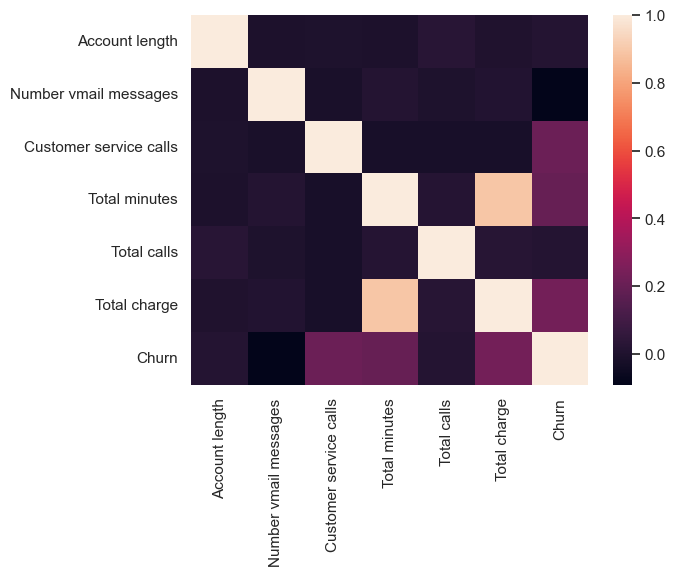

In [310]:
sns.heatmap(dataset[selected_columns].corr())

## 4. Realiza la prueba de correlación de Spearman entre las variables de mayor correlación y comenta sobre la significancia estadística de la correlación

Prueba de Correlación
* HO: no existe correlación entre las variables
* HA: existe correlación entre las variables

In [312]:
ss.spearmanr(dataset["Total minutes"], dataset["Total charge"])

SignificanceResult(statistic=0.8802417841717907, pvalue=0.0)

Comprobamos que existe correlación entre Total minutes y Total charge con una confianza del 95%. Continuaremos con el test estadístico con las otras variables respecto al target (Churn)

In [311]:
def test_spearman_correlation(dataframe, columns_of_interest):
    for x_col, y_col in combinations(columns_of_interest, 2):
        corr, p_value = ss.spearmanr(dataframe[x_col], dataframe[y_col])
        if p_value < 0.05:
            print(f"Correlación de Spearman entre {x_col} y {y_col}: {corr:.2f}")
            print(f"P-valor: {p_value:.4f}")
            print("Dado que el P-valor es menor a 0.05 rechazamos la hipótesis nula, hay suficiente evidencia para afirmar la hipotesis alternativa.")
            print("Esto sugiere que hay una correlación significativa entre las variables.\n")

columns_of_interest = ['Account length', 'Number vmail messages', 
                       'Customer service calls',
                       'Total minutes', 'Total calls', 'Total charge', 'Churn']
test_spearman_correlation(dataset, columns_of_interest)


Correlación de Spearman entre Number vmail messages y Churn: -0.10
P-valor: 0.0000
Dado que el P-valor es menor a 0.05 rechazamos la hipótesis nula, hay suficiente evidencia para afirmar la hipotesis alternativa.
Esto sugiere que hay una correlación significativa entre las variables.

Correlación de Spearman entre Customer service calls y Churn: 0.14
P-valor: 0.0000
Dado que el P-valor es menor a 0.05 rechazamos la hipótesis nula, hay suficiente evidencia para afirmar la hipotesis alternativa.
Esto sugiere que hay una correlación significativa entre las variables.

Correlación de Spearman entre Total minutes y Total charge: 0.88
P-valor: 0.0000
Dado que el P-valor es menor a 0.05 rechazamos la hipótesis nula, hay suficiente evidencia para afirmar la hipotesis alternativa.
Esto sugiere que hay una correlación significativa entre las variables.

Correlación de Spearman entre Total minutes y Churn: 0.17
P-valor: 0.0000
Dado que el P-valor es menor a 0.05 rechazamos la hipótesis nula, hay 

## 5. Visualiza la distribución de las cargas totales (charges) según la variable objetivo Churn (cancelación) y comenta sobre las observaciones más relevantes.

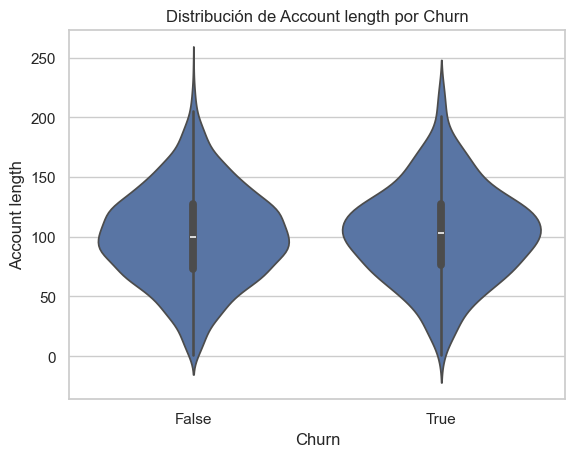

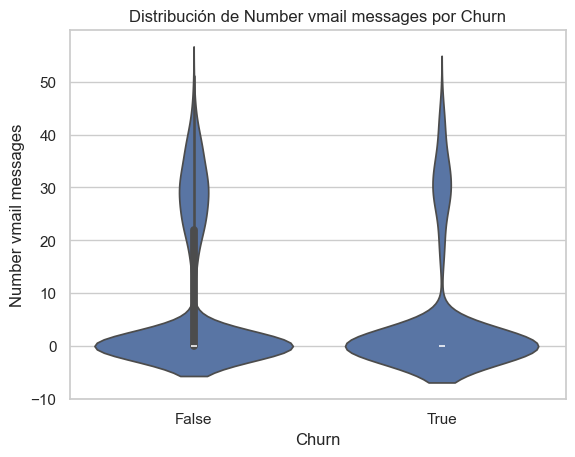

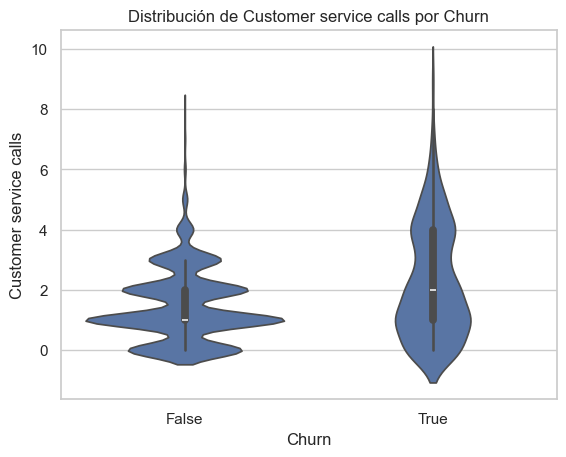

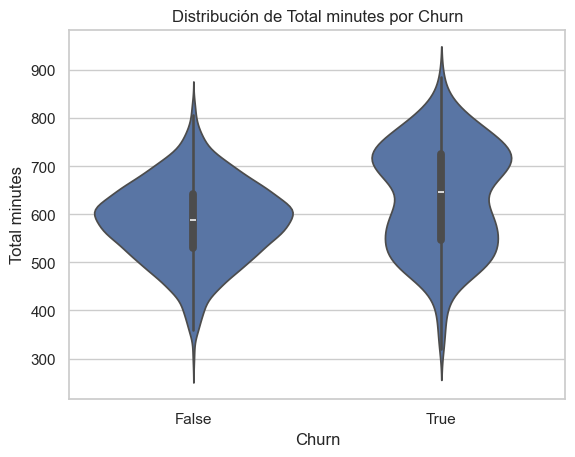

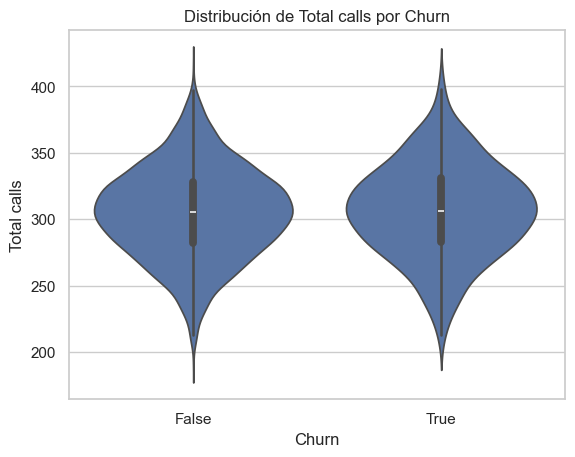

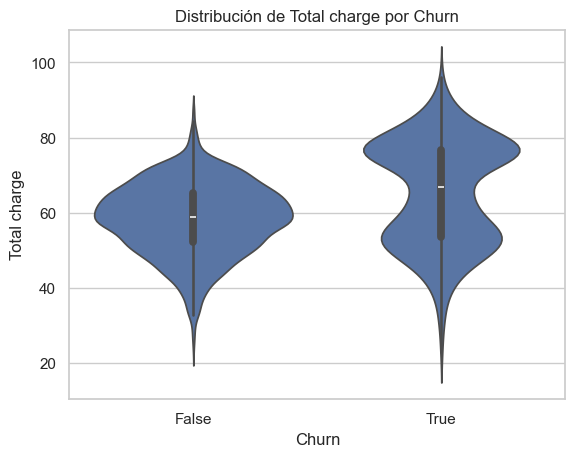

In [320]:
def visualizar_distribucion_por_churn(variable):
    sns.violinplot(x='Churn', y=variable, data=dataset)
    plt.title(f'Distribución de {variable} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(variable)
    plt.show()

selected_columns = ['Account length', 'Number vmail messages', 
                       'Customer service calls',
                       'Total minutes', 'Total calls', 'Total charge']

for variable in selected_columns:
    visualizar_distribucion_por_churn(variable)

* Account length (Duración de la cuenta): No hay una diferencia significativa en la duración de la cuenta entre los dos grupos. Esta variable tampoco paso el test de correlación anterior. Podemos descartar esta variable y explorar otras que puedan estar más relacionadas con el abandono. 

* Number vmail messages (Número de mensajes de correo de voz): Ambos grupos muestran una mediana de cero mensajes de correo de voz, pero el grupo que permanece tiene una dispersión más amplia en la cantidad de mensajes recibidos. Podemos mejorar el servicio de correo de voz o utilizar la frecuencia de uso del correo de voz como un indicador de compromiso del cliente.

* Customer service calls (Llamadas al servicio al cliente): Los clientes que abandonan tienden a realizar más llamadas al servicio al cliente en comparación con los que permanecen. La dispersión de las llamadas al servicio al cliente es mayor en el grupo de clientes que abandonan. Podriamos identificar las razones detrás de las múltiples llamadas al servicio al cliente para reducir la tasa de abandono.

* Total minutes (Minutos totales de llamada): Los clientes que abandonan tienden a tener una mayor cantidad de minutos totales de llamada en comparación con los que permanecen. Ambos grupos muestran una distribución similar en cuanto a los minutos de llamada, pero el grupo que abandona tiene una media y una dispersión más altas. Deberiamos analizar la calidad y el contenido de las llamadas para entender mejor por qué los clientes que realizan más llamadas están abandonando.

* Total calls (Total de llamadas): No hay una diferencia significativa en el total de llamadas entre los clientes que permanecen y los que abandonan, tanto en términos de promedio como de distribución. Deberiamos considerar otras variables que puedan estar más relacionadas con el abandono, ya que el total de llamadas no parece ser un factor distintivo.

* Total charge (Carga total): Los clientes que abandonan tienden a tener una carga total más alta en comparación con los que permanecen. La distribución de la carga total es más amplia en el grupo de clientes que abandonan. Evaluar si el aumento de la carga total está relacionado con problemas relacionados a la factura o cobro por los servicios.

## 6. Entrenamiento de modelos de machine learning

### Selección de variables basado en el análisis estadistico y preprocesamiento

In [280]:
dataset[['Number vmail messages', 'Customer service calls', 'Total calls', 'Total charge']]

,Number vmail messages,Customer service calls,Total calls,Total charge
0,25,1,303,75.56
1,26,1,332,59.24
2,0,0,333,62.29
3,0,2,255,66.80
4,0,3,359,52.09
...,...,...,...,...
3328,26,2,314,50.79
3329,29,1,338,44.06
3330,0,3,370,53.20
3331,0,1,305,57.52


In [110]:
X = dataset[['Number vmail messages', 'Customer service calls', 'Total calls', 'Total charge']].values
y = dataset["Churn"].values

Desbalance de target, esta es la causa de la gran cantidad de falsos negativos

In [111]:
target_count = pd.Series(y).value_counts()
print("Recuento de muestras por clase:")
target_count

Recuento de muestras por clase:


False    2850
True      483
Name: count, dtype: int64

In [112]:
oversample = SMOTE()
X_smote, y_smote  = oversample.fit_resample(X, y)

In [113]:
target_count = pd.Series(y_smote).value_counts()
print("Recuento de muestras por clase:")
target_count

Recuento de muestras por clase:


False    2850
True     2850
Name: count, dtype: int64

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 0)

In [115]:
transformer = StandardScaler()
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

### 1. KNN

In [116]:
cv_scores_KNN = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=5)
cv_scores_KNN

array([0.83991228, 0.84429825, 0.84539474, 0.84539474, 0.86732456])

In [117]:
print("cv_scores mean: {}".format(np.mean(cv_scores_KNN)))
print("cv_scores std: {}".format(np.std(cv_scores_KNN)))

cv_scores mean: 0.8484649122807018
cv_scores std: 0.009644137468112284


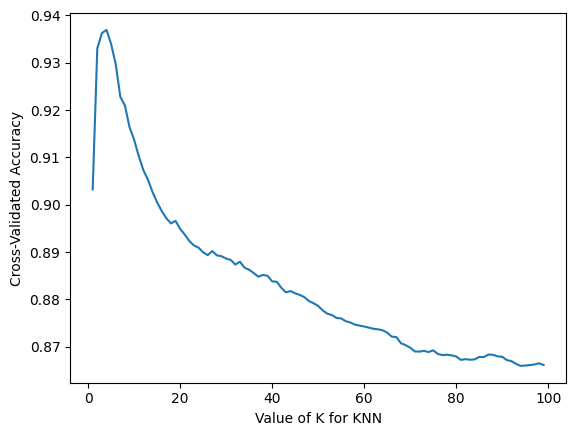

Best K = 4


In [118]:
k_range = range(1, 100)
k_scores = []
best_K = 0
current_auc = 0
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred_KNN = knn.predict(X_test)
    y_pred_prob_KNN = knn.predict_proba(X_test)
    false_positive_rate_KNN, true_positive_rate_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN[:,1])
    roc_auc_KNN = auc(false_positive_rate_KNN, true_positive_rate_KNN)
    k_scores.append(roc_auc_KNN)

    if roc_auc_KNN > current_auc:
        current_auc = roc_auc_KNN
        best_K = k
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
print("Best K = " + str(best_K))

In [119]:
classifier_KNN = KNeighborsClassifier(n_neighbors=best_K).fit(X_train, y_train)
y_pred_KNN = classifier_KNN.predict(X_test)

Confusion matrix, without normalization
[[520  41]
 [104 475]]
Normalized confusion matrix
[[0.92691622 0.07308378]
 [0.17962003 0.82037997]]


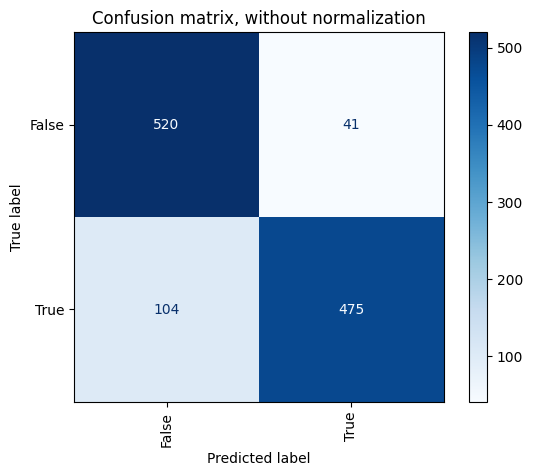

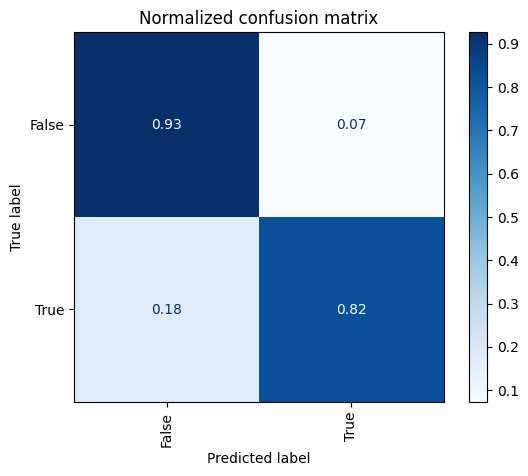

In [120]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_KNN, display_labels=classifier_KNN.classes_)
    if normalize:
        cm_normalized = cm_KNN.astype('float') / cm_KNN.sum(axis=1)[:, np.newaxis]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=classifier_KNN.classes_)
        disp = disp.plot(cmap=plt.cm.Blues, values_format='.2f', xticks_rotation='vertical')
    else:
        disp = disp.plot(cmap=plt.cm.Blues, values_format='d', xticks_rotation='vertical')

    disp.ax_.set_title(title)

    print(title)
    print(cm_KNN if not normalize else cm_normalized)

plt.show()

In [121]:
y_pred_prob_KNN = classifier_KNN.predict_proba(X_test)
y_pred_prob_KNN[:5,:]

array([[0.  , 1.  ],
       [0.75, 0.25],
       [1.  , 0.  ],
       [0.5 , 0.5 ],
       [0.  , 1.  ]])

In [122]:
false_positive_rate_KNN, true_positive_rate_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN[:,1])
roc_auc_KNN = auc(false_positive_rate_KNN, true_positive_rate_KNN)
roc_auc_KNN

0.9369479617879495

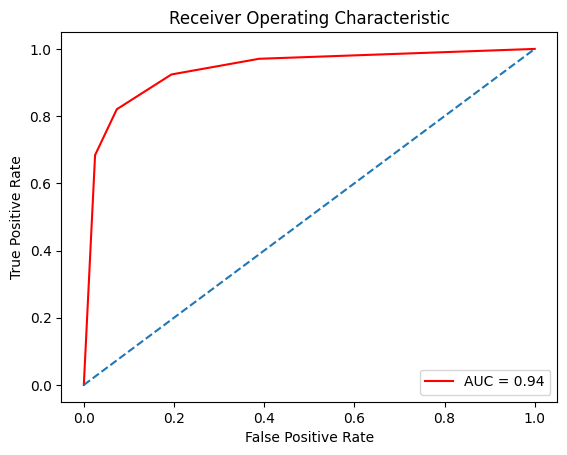

In [123]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_KNN, true_positive_rate_KNN, color='red',label = 'AUC = %0.2f' % roc_auc_KNN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [124]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

       False       0.83      0.93      0.88       561
        True       0.92      0.82      0.87       579

    accuracy                           0.87      1140
   macro avg       0.88      0.87      0.87      1140
weighted avg       0.88      0.87      0.87      1140



### 2. Decision Tree

In [125]:
cv_scores_DT = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=5)
cv_scores_DT

array([0.91776316, 0.9122807 , 0.90570175, 0.92434211, 0.93201754])

In [126]:
print("cv_scores mean: {}".format(np.mean(cv_scores_DT)))
print("cv_scores std: {}".format(np.std(cv_scores_DT)))

cv_scores mean: 0.9184210526315789
cv_scores std: 0.009163413340252703


In [127]:
param_grid_DT = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_DT = GridSearchCV(DecisionTreeClassifier(), param_grid_DT, refit=True, verbose=2, cv=5, n_jobs=-1)
grid_DT.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_sa

[CV] END ...criterion=gini, max_depth=20, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=20, min_samples_leaf=5; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_samples_leaf=20; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_samples_leaf=20; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_samples_leaf=20; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_samples_leaf=20; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_samples_leaf=20; total time=   0.0s
[CV] END ..criterion=gini, m

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             verbose=2)

In [128]:
grid_DT.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}

In [158]:
classifier_DT = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, criterion='entropy').fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

Confusion matrix, without normalization
[[557   4]
 [ 59 520]]
Normalized confusion matrix
[[0.99286988 0.00713012]
 [0.10189983 0.89810017]]


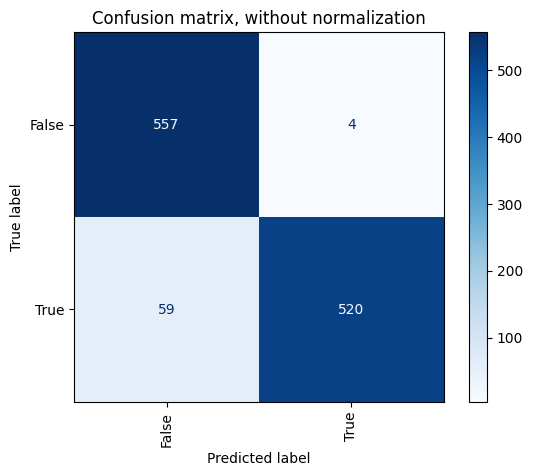

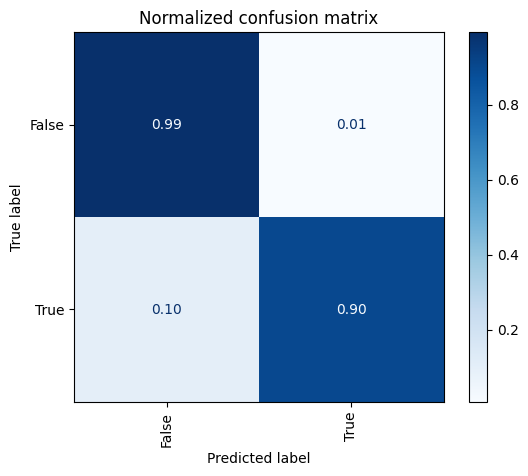

In [159]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
cm_DT = confusion_matrix(y_test, classifier_DT.predict(X_test))
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=classifier_DT.classes_)
    if normalize:
        cm_normalized = cm_DT.astype('float') / cm_DT.sum(axis=1)[:, np.newaxis]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=classifier_DT.classes_)
        disp = disp.plot(cmap=plt.cm.Blues, values_format='.2f', xticks_rotation='vertical')
    else:
        disp = disp.plot(cmap=plt.cm.Blues, values_format='d', xticks_rotation='vertical')

    disp.ax_.set_title(title)

    print(title)
    print(cm_DT if not normalize else cm_normalized)

plt.show()

In [160]:
y_pred_prob_DT = classifier_DT.predict_proba(X_test)
y_pred_prob_DT[:5,:]

array([[0.        , 1.        ],
       [0.93362832, 0.06637168],
       [0.97752809, 0.02247191],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [161]:
false_positive_rate_DT, true_positive_rate_DT, thresholds_DT = roc_curve(y_test, y_pred_prob_DT[:,1])
roc_auc_DT = auc(false_positive_rate_DT, true_positive_rate_DT)
roc_auc_DT

0.9627192374830291

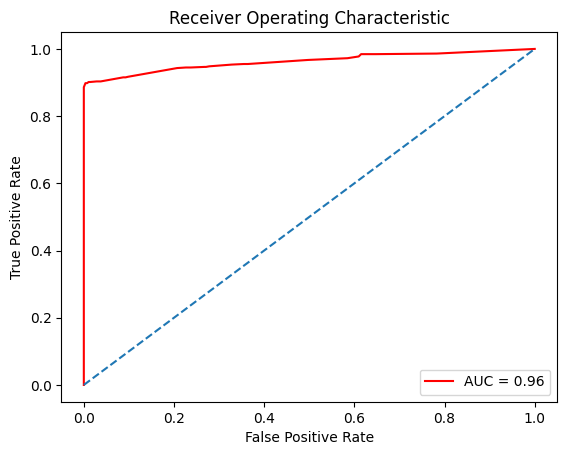

In [162]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_DT, true_positive_rate_DT, color='red',label = 'AUC = %0.2f' % roc_auc_DT)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [163]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

       False       0.90      0.99      0.95       561
        True       0.99      0.90      0.94       579

    accuracy                           0.94      1140
   macro avg       0.95      0.95      0.94      1140
weighted avg       0.95      0.94      0.94      1140



### 3. Naive Bayes

In [135]:
cv_scores_NB = cross_val_score(GaussianNB(), X_train, y_train, cv=5)
cv_scores_NB

array([0.77192982, 0.75767544, 0.71710526, 0.72149123, 0.76644737])

In [136]:
print("cv_scores mean: {}".format(np.mean(cv_scores_NB)))
print("cv_scores std: {}".format(np.std(cv_scores_NB)))

cv_scores mean: 0.7469298245614036
cv_scores std: 0.0230565799443872


In [137]:
classifier_NB = GaussianNB().fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

Confusion matrix, without normalization
[[445 116]
 [174 405]]
Normalized confusion matrix
[[0.79322638 0.20677362]
 [0.30051813 0.69948187]]


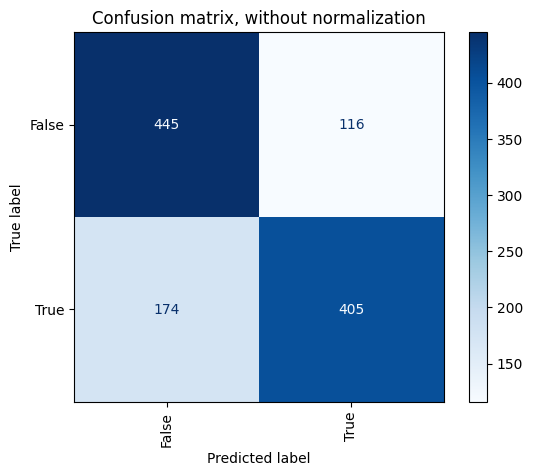

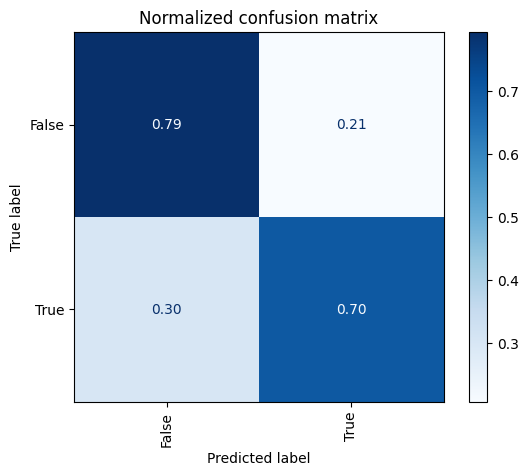

In [138]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
cm_NB = confusion_matrix(y_test, y_pred_NB)
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=classifier_NB.classes_)
    if normalize:
        cm_normalized = cm_NB.astype('float') / cm_NB.sum(axis=1)[:, np.newaxis]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=classifier_NB.classes_)
        disp = disp.plot(cmap=plt.cm.Blues, values_format='.2f', xticks_rotation='vertical')
    else:
        disp = disp.plot(cmap=plt.cm.Blues, values_format='d', xticks_rotation='vertical')

    disp.ax_.set_title(title)

    print(title)
    print(cm_NB if not normalize else cm_normalized)

plt.show()

In [139]:
y_pred_prob_NB = classifier_NB.predict_proba(X_test)
y_pred_prob_NB[:5,:]

array([[0.17015248, 0.82984752],
       [0.64405701, 0.35594299],
       [0.71946129, 0.28053871],
       [0.69372551, 0.30627449],
       [0.22864146, 0.77135854]])

In [140]:
false_positive_rate_NB, true_positive_rate_NB, thresholds_NB = roc_curve(y_test, y_pred_prob_NB[:,1])
roc_auc_NB = auc(false_positive_rate_NB, true_positive_rate_NB)
roc_auc_NB

0.795695448849975

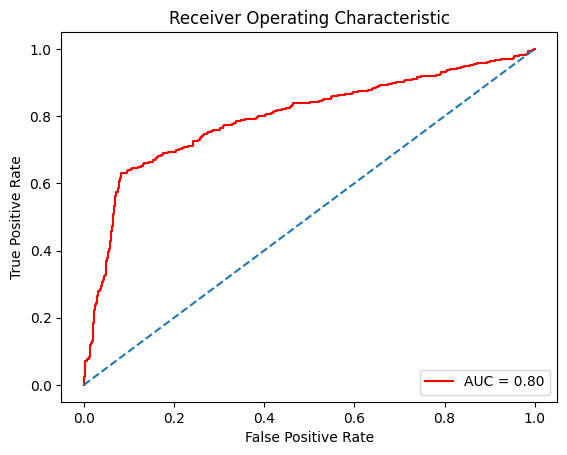

In [141]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_NB, true_positive_rate_NB, color='red',label = 'AUC = %0.2f' % roc_auc_NB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [142]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

       False       0.72      0.79      0.75       561
        True       0.78      0.70      0.74       579

    accuracy                           0.75      1140
   macro avg       0.75      0.75      0.75      1140
weighted avg       0.75      0.75      0.75      1140



### 4. ANN

In [143]:
cv_scores_ANN = cross_val_score(MLPClassifier(max_iter=1500), X_train, y_train, cv=5)
cv_scores_ANN

array([0.81688596, 0.83004386, 0.79605263, 0.80921053, 0.84429825])

In [144]:
print("cv_scores mean: {}".format(np.mean(cv_scores_ANN)))
print("cv_scores std: {}".format(np.std(cv_scores_ANN)))

cv_scores mean: 0.8192982456140351
cv_scores std: 0.016663780913607797


In [190]:
param_grid_ANN = {
    'hidden_layer_sizes': [(3,), (3,6), (3,6,3), (3,18,6), (10,30,10), (5,10,5), (5,20,10)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.05],
    'learning_rate': ['constant', 'adaptive', 'invscaling'],
}
grid_ANN = GridSearchCV(MLPClassifier(max_iter=10000), param_grid_ANN, refit=True, verbose=1, cv=5, n_jobs=-1)
grid_ANN.fit(X_train, y_train)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=10000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01, 0.05],
                         'hidden_layer_sizes': [(3,), (3, 6), (3, 6, 3),
                                                (3, 18, 6), (10, 30, 10),
                                                (5, 10, 5), (5, 20, 10)],
                         'learning_rate': ['constant', 'adaptive',
                                           'invscaling'],
                         'solver': ['sgd', 'adam']},
             verbose=1)

In [192]:
grid_ANN.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (10, 30, 10),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [193]:
classifier_ANN = MLPClassifier(max_iter=10000,activation='relu', hidden_layer_sizes=(10,30,10), learning_rate='adaptive',alpha=0.01, solver='adam').fit(X_train, y_train)
y_pred_ANN = classifier_ANN.predict(X_test)

Confusion matrix, without normalization
[[508  53]
 [153 426]]
Normalized confusion matrix
[[0.90552585 0.09447415]
 [0.2642487  0.7357513 ]]


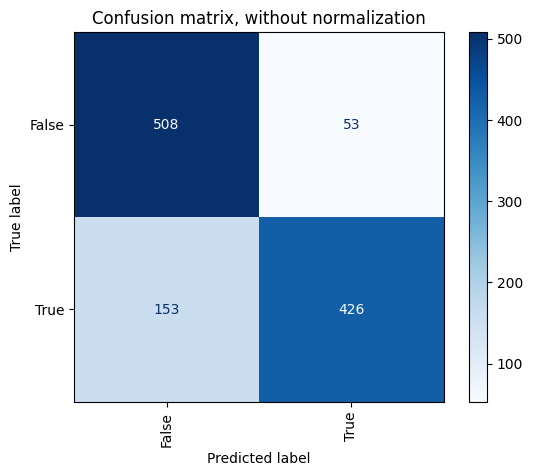

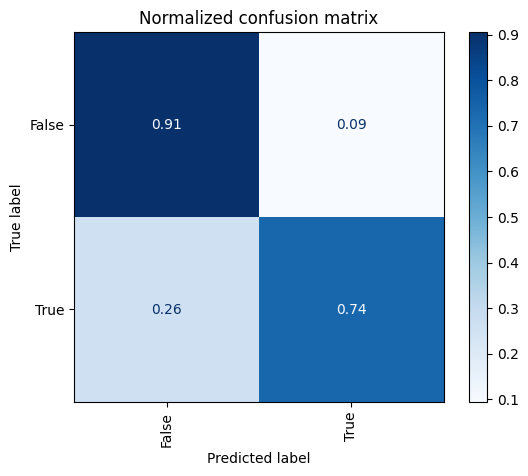

In [194]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
cm_ANN = confusion_matrix(y_test, classifier_ANN.predict(X_test))
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_ANN, display_labels=classifier_ANN.classes_)
    if normalize:
        cm_normalized = cm_ANN.astype('float') / cm_ANN.sum(axis=1)[:, np.newaxis]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=classifier_ANN.classes_)
        disp = disp.plot(cmap=plt.cm.Blues, values_format='.2f', xticks_rotation='vertical')
    else:
        disp = disp.plot(cmap=plt.cm.Blues, values_format='d', xticks_rotation='vertical')

    disp.ax_.set_title(title)

    print(title)
    print(cm_ANN if not normalize else cm_normalized)

plt.show()

In [195]:
y_pred_prob_ANN = classifier_ANN.predict_proba(X_test)
y_pred_prob_ANN[:5,:]

array([[1.08801274e-05, 9.99989120e-01],
       [6.16290551e-01, 3.83709449e-01],
       [8.14501118e-01, 1.85498882e-01],
       [9.23769683e-01, 7.62303166e-02],
       [6.66803986e-05, 9.99933320e-01]])

In [196]:
false_positive_rate_ANN, true_positive_rate_ANN, thresholds_ANN = roc_curve(y_test, y_pred_prob_ANN[:,1])
roc_auc_ANN = auc(false_positive_rate_ANN, true_positive_rate_ANN)
roc_auc_ANN

0.8984388228521115

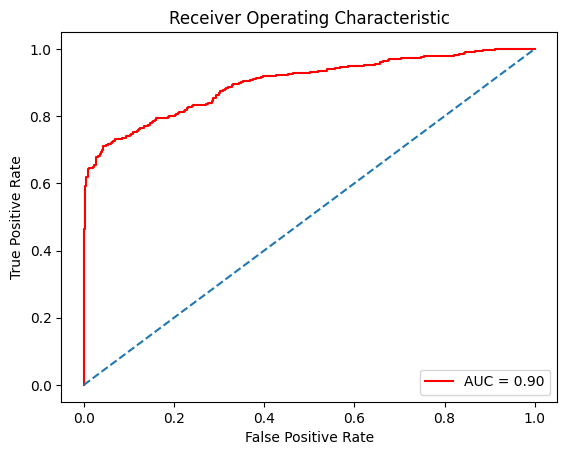

In [197]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_ANN, true_positive_rate_ANN, color='red',label = 'AUC = %0.2f' % roc_auc_ANN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [198]:
print(classification_report(y_test, y_pred_ANN))

              precision    recall  f1-score   support

       False       0.77      0.91      0.83       561
        True       0.89      0.74      0.81       579

    accuracy                           0.82      1140
   macro avg       0.83      0.82      0.82      1140
weighted avg       0.83      0.82      0.82      1140



### 5. Boosting

In [199]:
cv_scores_GB = cross_val_score(GradientBoostingClassifier(),X_train,y_train,cv=5)
cv_scores_GB

array([0.93092105, 0.92982456, 0.93201754, 0.94517544, 0.95504386])

In [200]:
print("cv_scores mean:{}".format(np.mean(cv_scores_GB)))
print("cv_scores std:{}".format(np.std(cv_scores_GB)))

cv_scores mean:0.9385964912280702
cv_scores std:0.009929150370764729


In [201]:
param_grid_GB = {
    'n_estimators': [200, 700],
    'max_features': [1.0, 'sqrt', 'log2'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid_GB = GridSearchCV(GradientBoostingClassifier(),param_grid_GB,refit=True,verbose=1,cv=5, n_jobs=-1)
grid_GB.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [1.0, 'sqrt', 'log2'],
                         'n_estimators': [200, 700]},
             verbose=1)

In [203]:
grid_GB.best_params_

{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}

In [204]:
classifier_GB = GradientBoostingClassifier(max_depth=10, max_features='log2', n_estimators=200).fit(X_train, y_train)
y_pred_GB = classifier_GB.predict(X_test)

Confusion matrix, without normalization
[[556   5]
 [ 42 537]]
Normalized confusion matrix
[[0.99108734 0.00891266]
 [0.07253886 0.92746114]]


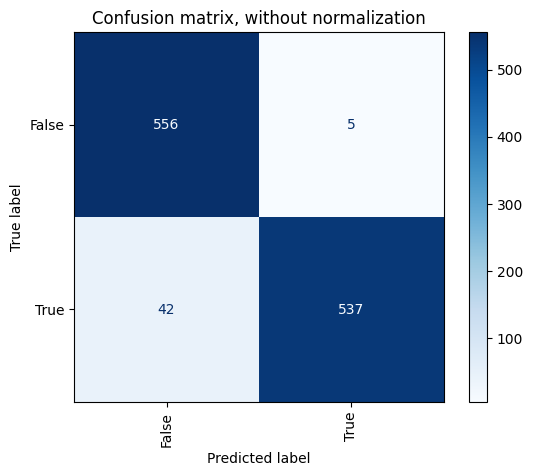

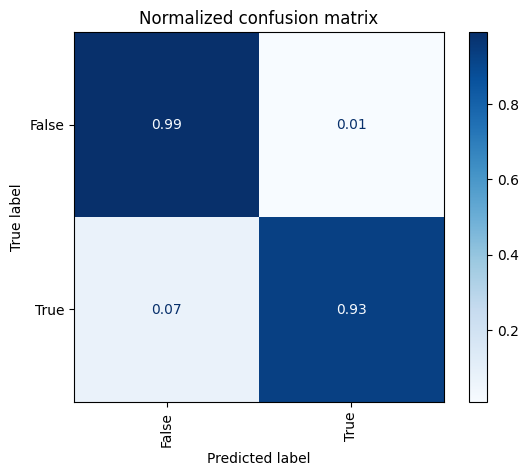

In [205]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
cm_GB = confusion_matrix(y_test, y_pred_GB)
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_GB, display_labels=classifier_GB.classes_)
    if normalize:
        cm_normalized = cm_GB.astype('float') / cm_GB.sum(axis=1)[:, np.newaxis]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=classifier_GB.classes_)
        disp = disp.plot(cmap=plt.cm.Blues, values_format='.2f', xticks_rotation='vertical')
    else:
        disp = disp.plot(cmap=plt.cm.Blues, values_format='d', xticks_rotation='vertical')

    disp.ax_.set_title(title)

    print(title)
    print(cm_GB if not normalize else cm_normalized)
plt.show()

In [206]:
y_pred_prob_GB = classifier_GB.predict_proba(X_test)
y_pred_prob_GB[:5,:]

array([[3.23486535e-04, 9.99676513e-01],
       [9.81467593e-01, 1.85324073e-02],
       [9.95217067e-01, 4.78293306e-03],
       [2.98264957e-03, 9.97017350e-01],
       [1.71581913e-05, 9.99982842e-01]])

In [207]:
false_positive_rate_GB, true_positive_rate_GB, thresholds_GB = roc_curve(y_test, y_pred_prob_GB[:,1])
roc_auc_GB = auc(false_positive_rate_GB, true_positive_rate_GB)
roc_auc_GB

0.983242975318562

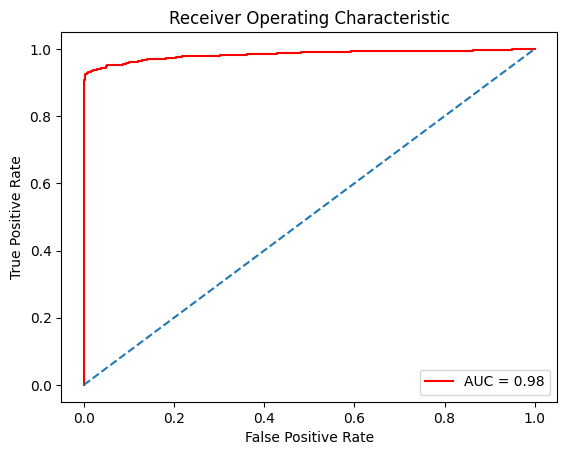

In [208]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_GB, true_positive_rate_GB, color='red',label = 'AUC = %0.2f' % roc_auc_GB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [209]:
print(classification_report(y_test, y_pred_GB))

              precision    recall  f1-score   support

       False       0.93      0.99      0.96       561
        True       0.99      0.93      0.96       579

    accuracy                           0.96      1140
   macro avg       0.96      0.96      0.96      1140
weighted avg       0.96      0.96      0.96      1140



### 6. XGBoosting

In [210]:
cv_scores_XG = cross_val_score(XGBClassifier(),X_train,y_train,cv=5)
cv_scores_XG

array([0.94298246, 0.93969298, 0.92982456, 0.94736842, 0.94846491])

In [211]:
print("cv_scores mean:{}".format(np.mean(cv_scores_XG)))
print("cv_scores std:{}".format(np.std(cv_scores_XG)))

cv_scores mean:0.9416666666666667
cv_scores std:0.0067020643815509226


In [212]:
param_grid_XG = {
    'n_estimators': [100, 200, 500, 700, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}
grid_XG = GridSearchCV(XGBClassifier(),param_grid_XG,refit=True,verbose=1, cv=5, n_jobs=-1)
grid_XG.fit(X_train,y_train)

Fitting 5 folds for each of 10935 candidates, totalling 54675 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 500, 700, 1000],
                         'reg_alpha': [0, 0.1, 0.5],
                         'reg_lambda': [0, 0.1, 0.5],
                         'subsample': [0.5, 0.7, 1.0]},
             verbose=1)

In [213]:
grid_XG.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 500,
 'reg_alpha': 0.5,
 'reg_lambda': 0.1,
 'subsample': 0.7}

In [233]:
classifier_XG = XGBClassifier(max_depth=7, n_estimators=500, learning_rate=0.1, gamma=0, colsample_bytree=1.0, reg_alpha=0.5,reg_lambda=0.1, subsample=0.7).fit(X_train, y_train)
y_pred_XG = classifier_XG.predict(X_test)

Confusion matrix, without normalization
[[550  11]
 [ 48 531]]
Normalized confusion matrix
[[0.98039216 0.01960784]
 [0.08290155 0.91709845]]


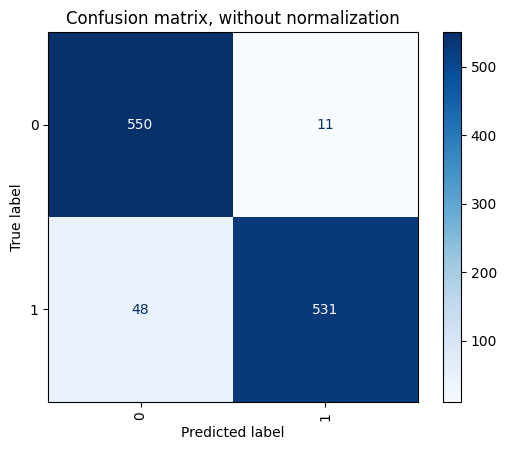

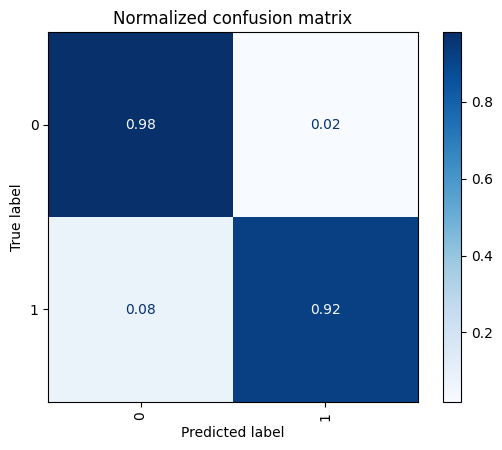

In [234]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
cm_XG = confusion_matrix(y_test, y_pred_XG)
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_XG, display_labels=classifier_XG.classes_)
    if normalize:
        cm_normalized = cm_XG.astype('float') / cm_XG.sum(axis=1)[:, np.newaxis]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=classifier_XG.classes_)
        disp = disp.plot(cmap=plt.cm.Blues, values_format='.2f', xticks_rotation='vertical')
    else:
        disp = disp.plot(cmap=plt.cm.Blues, values_format='d', xticks_rotation='vertical')

    disp.ax_.set_title(title)

    print(title)
    print(cm_XG if not normalize else cm_normalized)
plt.show()

In [235]:
y_pred_prob_XG = classifier_XG.predict_proba(X_test)
y_pred_prob_XG[:5,:]

array([[5.2524209e-03, 9.9474758e-01],
       [6.8614370e-01, 3.1385630e-01],
       [9.7800136e-01, 2.1998663e-02],
       [2.4281263e-02, 9.7571874e-01],
       [8.1777573e-05, 9.9991822e-01]], dtype=float32)

In [236]:
false_positive_rate_XG, true_positive_rate_XG, thresholds_XG = roc_curve(y_test, y_pred_prob_XG[:,1])
roc_auc_XG = auc(false_positive_rate_XG, true_positive_rate_XG)
roc_auc_XG

0.9769256108786741

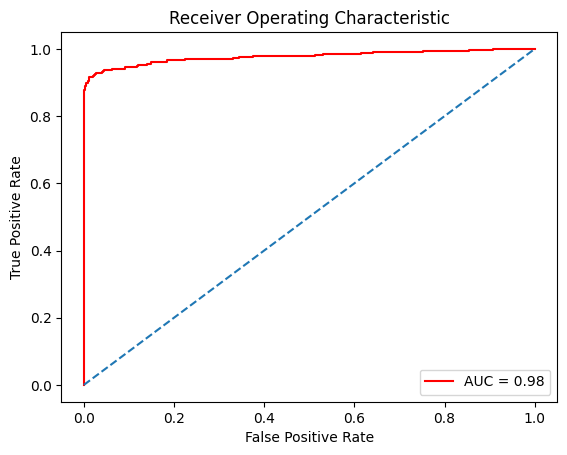

In [237]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_XG, true_positive_rate_XG, color='red',label = 'AUC = %0.2f' % roc_auc_XG)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [238]:
print(classification_report(y_test, y_pred_XG))

              precision    recall  f1-score   support

       False       0.92      0.98      0.95       561
        True       0.98      0.92      0.95       579

    accuracy                           0.95      1140
   macro avg       0.95      0.95      0.95      1140
weighted avg       0.95      0.95      0.95      1140



### 7. Random Forest

In [214]:
cv_scores_RF = cross_val_score(RandomForestClassifier(),X_train, y_train, cv=5)
cv_scores_RF

array([0.93859649, 0.94736842, 0.94078947, 0.95285088, 0.95065789])

In [215]:
print("cv_scores mean: {}".format(np.mean(cv_scores_RF)))
print("cv_scores std: {}".format(np.std(cv_scores_RF)))

cv_scores mean: 0.9460526315789475
cv_scores std: 0.005521788733339546


In [216]:
param_grid_RF = {
    'n_estimators': [200, 700],
    'max_features': [1.0, 'sqrt', 'log2'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid_RF = GridSearchCV(RandomForestClassifier(),param_grid_RF,refit=True, verbose=1, cv=5, n_jobs=-1)
grid_RF.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [1.0, 'sqrt', 'log2'],
                         'n_estimators': [200, 700]},
             verbose=1)

In [217]:
grid_RF.best_params_

{'max_depth': 9, 'max_features': 1.0, 'n_estimators': 200}

In [242]:
classifier_RF = RandomForestClassifier(max_depth=9, max_features=1.0, n_estimators=200).fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

Confusion matrix, without normalization
[[558   3]
 [ 56 523]]
Normalized confusion matrix
[[0.99465241 0.00534759]
 [0.09671848 0.90328152]]


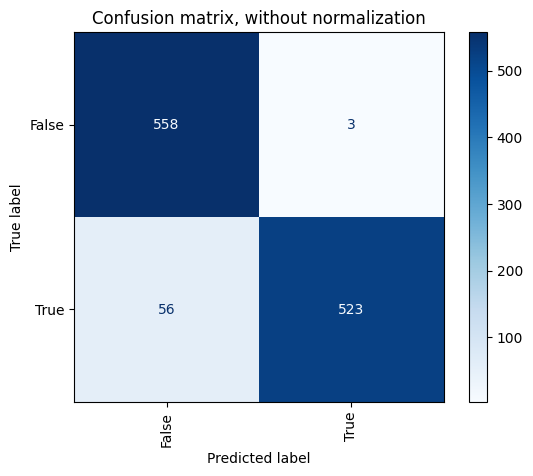

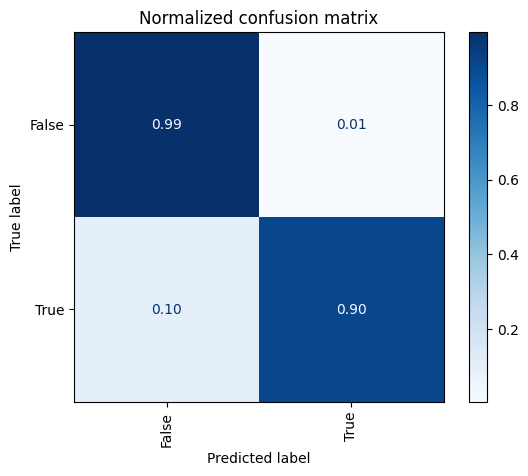

In [243]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
cm_RF = confusion_matrix(y_test, y_pred_RF)
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_RF, display_labels=classifier_RF.classes_)
    if normalize:
        cm_normalized = cm_RF.astype('float') / cm_RF.sum(axis=1)[:, np.newaxis]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=classifier_RF.classes_)
        disp = disp.plot(cmap=plt.cm.Blues, values_format='.2f', xticks_rotation='vertical')
    else:
        disp = disp.plot(cmap=plt.cm.Blues, values_format='d', xticks_rotation='vertical')

    disp.ax_.set_title(title)

    print(title)
    print(cm_RF if not normalize else cm_normalized)

plt.show()

In [244]:
y_pred_prob_RF = classifier_RF.predict_proba(X_test)
y_pred_prob_RF[0:5]

array([[0.        , 1.        ],
       [0.92848044, 0.07151956],
       [0.97011533, 0.02988467],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [245]:
false_positive_rate_RF, true_positive_rate_RF, thresholds_RF = roc_curve(y_test, y_pred_prob_RF[:,1])
roc_auc_RF = auc(false_positive_rate_RF, true_positive_rate_RF)
roc_auc_RF

0.9757434140244261

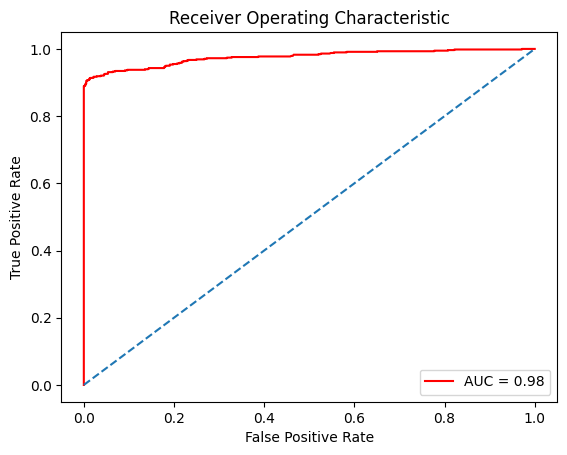

In [246]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_RF, true_positive_rate_RF, color='red',label = 'AUC = %0.2f' % roc_auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [247]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

       False       0.91      0.99      0.95       561
        True       0.99      0.90      0.95       579

    accuracy                           0.95      1140
   macro avg       0.95      0.95      0.95      1140
weighted avg       0.95      0.95      0.95      1140



### 8. Logistic Regresion

In [218]:
cv_scores_LR = cross_val_score(LogisticRegression(),X_train,y_train,cv=5)
cv_scores_LR

array([0.74780702, 0.72258772, 0.69078947, 0.7127193 , 0.74232456])

In [219]:
print("cv_scores mean:{}".format(np.mean(cv_scores_LR)))
print("cv_scores std:{}".format(np.std(cv_scores_LR)))

cv_scores mean:0.7232456140350877
cv_scores std:0.020648999835672543


In [220]:
param_grid_LR = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
}

grid_LR = GridSearchCV(LogisticRegression(max_iter = int(1e5)), param_grid_LR, refit=True, verbose=1, cv=5, n_jobs=-1)
grid_LR.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=1)

In [221]:
grid_LR.best_params_

{'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [258]:
classifier_LR = LogisticRegression(max_iter = 100, C=10, penalty='l1', solver="liblinear").fit(X_train, y_train)
y_pred_LR = classifier_LR.predict(X_test)

Confusion matrix, without normalization
[[403 158]
 [181 398]]
Normalized confusion matrix
[[0.71836007 0.28163993]
 [0.31260794 0.68739206]]


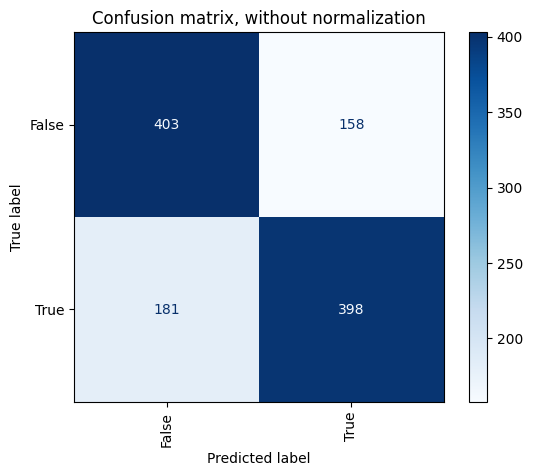

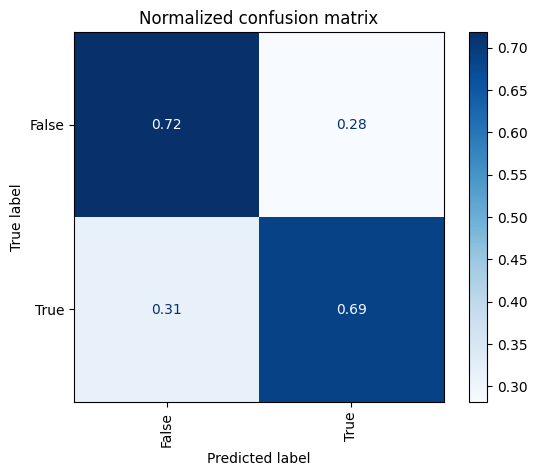

In [259]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
cm_LR = confusion_matrix(y_test, y_pred_LR)
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_LR, display_labels=classifier_LR.classes_)
    if normalize:
        cm_normalized = cm_LR.astype('float') / cm_LR.sum(axis=1)[:, np.newaxis]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=classifier_LR.classes_)
        disp = disp.plot(cmap=plt.cm.Blues, values_format='.2f', xticks_rotation='vertical')
    else:
        disp = disp.plot(cmap=plt.cm.Blues, values_format='d', xticks_rotation='vertical')

    disp.ax_.set_title(title)
    print(title)
    print(cm_LR if not normalize else cm_normalized)

plt.show()

In [260]:
y_pred_prob_LR = classifier_LR.predict_proba(X_test)
y_pred_prob_LR[0:5]

array([[0.18807106, 0.81192894],
       [0.67635653, 0.32364347],
       [0.73967701, 0.26032299],
       [0.69664518, 0.30335482],
       [0.37001084, 0.62998916]])

In [261]:
false_positive_rate_LR, true_positive_rate_LR, thresholds_LR = roc_curve(y_test, y_pred_prob_LR[:,1])
roc_auc_LR = auc(false_positive_rate_LR, true_positive_rate_LR)
roc_auc_LR

0.7476440725450173

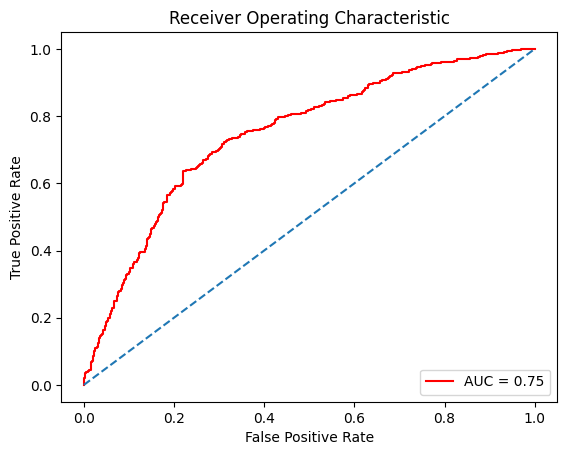

In [262]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_LR, true_positive_rate_LR, color='red',label = 'AUC = %0.2f' % roc_auc_LR)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [263]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

       False       0.69      0.72      0.70       561
        True       0.72      0.69      0.70       579

    accuracy                           0.70      1140
   macro avg       0.70      0.70      0.70      1140
weighted avg       0.70      0.70      0.70      1140



### 9. SVM

In [222]:
cv_scores_SVC = cross_val_score(SVC(kernel='linear',probability=True),X_train,y_train,cv=5)
cv_scores_SVC

array([0.75      , 0.71929825, 0.68969298, 0.7127193 , 0.74013158])

In [223]:
print("cv_scores mean:{}".format(np.mean(cv_scores_SVC)))
print("cv_scores std:{}".format(np.std(cv_scores_SVC)))

cv_scores mean:0.7223684210526315
cv_scores std:0.02120966651864072


In [224]:
param_grid_SVC = {
    'C': [0.1,1,10,100], 
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }
grid_SVC = GridSearchCV(SVC(), param_grid_SVC, refit=True, verbose=2, cv=5, n_jobs=-1)
grid_SVC.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [225]:
grid_SVC.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [264]:
classifier_SVC = SVC(kernel='rbf', C = 100, gamma = 1, probability=True).fit(X_train, y_train)
y_pred_SVC = classifier_SVC.predict(X_test)

Confusion matrix, without normalization
[[515  46]
 [119 460]]
Normalized confusion matrix
[[0.91800357 0.08199643]
 [0.20552677 0.79447323]]


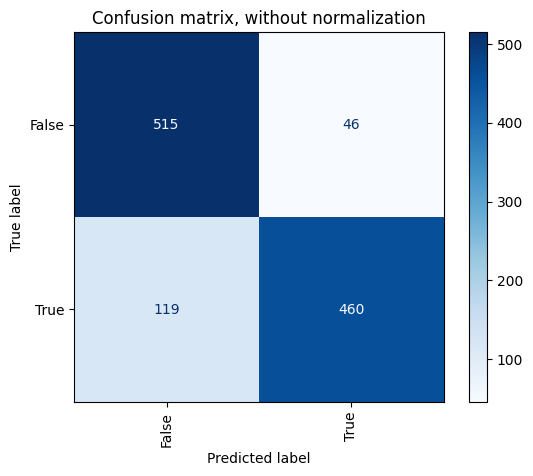

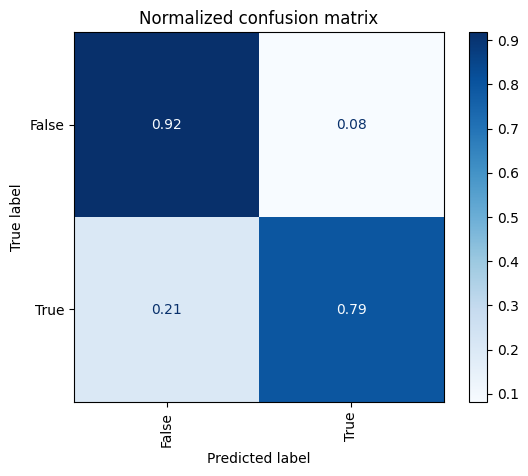

In [265]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
cm_SVC = confusion_matrix(y_test, y_pred_SVC)
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_SVC, display_labels=classifier_SVC.classes_)
    if normalize:
        cm_normalized = cm_SVC.astype('float') / cm_SVC.sum(axis=1)[:, np.newaxis]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=classifier_SVC.classes_)
        disp = disp.plot(cmap=plt.cm.Blues, values_format='.2f', xticks_rotation='vertical')
    else:
        disp = disp.plot(cmap=plt.cm.Blues, values_format='d', xticks_rotation='vertical')

    disp.ax_.set_title(title)
    print(title)
    print(cm_SVC if not normalize else cm_normalized)

plt.show()

In [266]:
y_pred_prob_SVC = classifier_SVC.predict_proba(X_test)
y_pred_prob_SVC[0:5]

array([[1.08427748e-10, 1.00000000e+00],
       [6.65606658e-01, 3.34393342e-01],
       [7.84568555e-01, 2.15431445e-01],
       [2.42119347e-01, 7.57880653e-01],
       [3.42040471e-06, 9.99996580e-01]])

In [267]:
false_positive_rate_SVC, true_positive_rate_SVC, thresholds_SVC = roc_curve(y_test, y_pred_prob_SVC[:,1])
roc_auc_SVC = auc(false_positive_rate_SVC, true_positive_rate_SVC)
roc_auc_SVC

0.9170337942053883

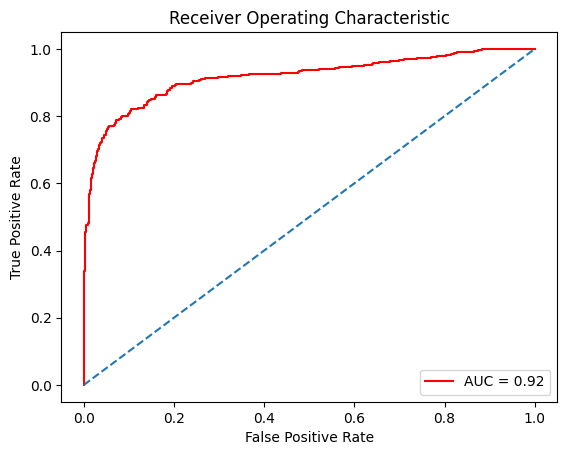

In [268]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_SVC,true_positive_rate_SVC, color='red',label = 'AUC = %0.2f' % roc_auc_SVC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [269]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

       False       0.81      0.92      0.86       561
        True       0.91      0.79      0.85       579

    accuracy                           0.86      1140
   macro avg       0.86      0.86      0.85      1140
weighted avg       0.86      0.86      0.85      1140



## 7. Comparación de modelos

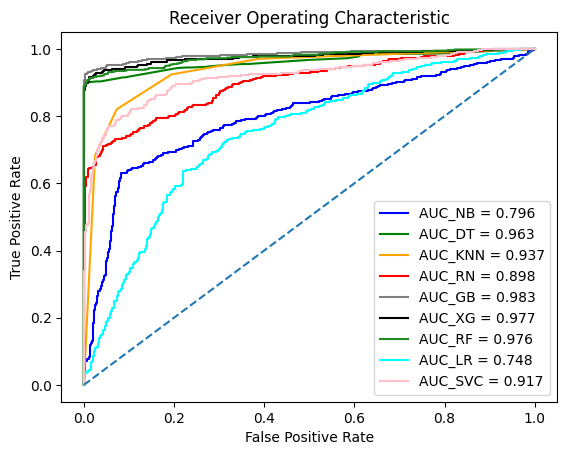

In [273]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_NB,true_positive_rate_NB, color='blue',label = 'AUC_NB = %0.3f' % roc_auc_NB)
plt.plot(false_positive_rate_DT,true_positive_rate_DT, color='green',label = 'AUC_DT = %0.3f' % roc_auc_DT)
plt.plot(false_positive_rate_KNN,true_positive_rate_KNN, color='orange',label = 'AUC_KNN = %0.3f' % roc_auc_KNN)
plt.plot(false_positive_rate_ANN,true_positive_rate_ANN, color='red',label = 'AUC_RN = %0.3f' % roc_auc_ANN)
plt.plot(false_positive_rate_GB,true_positive_rate_GB, color='gray',label = 'AUC_GB = %0.3f' % roc_auc_GB)
plt.plot(false_positive_rate_XG,true_positive_rate_XG, color='black',label = 'AUC_XG = %0.3f' % roc_auc_XG)
plt.plot(false_positive_rate_RF,true_positive_rate_RF, color='forestgreen',label = 'AUC_RF = %0.3f' % roc_auc_RF)
plt.plot(false_positive_rate_LR,true_positive_rate_LR, color='cyan',label = 'AUC_LR = %0.3f' % roc_auc_LR)
plt.plot(false_positive_rate_SVC,true_positive_rate_SVC, color='pink',label = 'AUC_SVC = %0.3f' % roc_auc_SVC)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Luego de entrenar los modelos de MachineLearning y evaluarlos podemos concluir que el mejor modelo de clasificación es el de Gradient Boosting al tener puntaje AUC de aproximadamente 98%

## 8. Asignación de categorías basadas en probabilidades de predicción

In [276]:
dataf_combined = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test),pd.DataFrame(y_pred_GB),pd.DataFrame(y_pred_prob_GB)],axis=1)
dataf_combined.columns = ['Number vmail messages', 'Customer service calls', 'Total calls', 'Total charge', 'Churn', 'Churn_Pred', 'Churn_Pred_Prob_0', 'Churn_Pred_Prob_1']
dataf_combined.head(10)

,Number vmail messages,Customer service calls,Total calls,Total charge,Churn,Churn_Pred,Churn_Pred_Prob_0,Churn_Pred_Prob_1
0,-0.530470,0.087142,-0.051726,1.519327,True,True,0.000323,0.999677
1,-0.530470,0.087142,0.677457,-1.054545,False,False,0.981468,0.018532
2,-0.530470,-0.577423,-0.547571,-0.748014,False,False,0.995217,0.004783
3,-0.530470,-0.843351,-0.497985,-0.219835,True,True,0.002983,0.997017
4,-0.530470,-0.989290,-1.371243,1.519425,True,True,0.000017,0.999983
5,-0.530470,2.432697,-0.345118,-0.766697,True,True,0.000081,0.999919
6,-0.530470,-1.241988,-1.889270,0.054061,True,False,0.997039,0.002961
7,-0.530470,-1.241988,-1.743433,-1.648705,False,False,0.995869,0.004131
8,1.533255,0.087142,0.589955,1.676291,False,False,0.832771,0.167229
9,-0.530470,0.087142,-0.576739,-0.552426,False,False,0.999400,0.000600


In [277]:
df_original_features = pd.DataFrame(X_test, columns=['Number vmail messages', 'Customer service calls', 'Total calls', 'Total charge'])
df_original = pd.DataFrame(transformer.inverse_transform(df_original_features), columns=['Number vmail messages', 'Customer service calls', 'Total calls', 'Total charge'])

df_original[['Churn', 'Churn_Pred', 'Churn_Pred_Prob_0', 'Churn_Pred_Prob_1']] = dataf_combined[['Churn', 'Churn_Pred', 'Churn_Pred_Prob_0', 'Churn_Pred_Prob_1']]
df_original.head(10)

,Number vmail messages,Customer service calls,Total calls,Total charge,Churn,Churn_Pred,Churn_Pred_Prob_0,Churn_Pred_Prob_1
0,0.0,2.000000e+00,304.000000,80.070000,True,True,0.000323,0.999677
1,0.0,2.000000e+00,329.000000,48.750000,False,False,0.981468,0.018532
2,0.0,1.000000e+00,287.000000,52.480000,False,False,0.995217,0.004783
3,0.0,5.998464e-01,288.700077,58.907116,True,True,0.002983,0.997017
4,0.0,3.802464e-01,258.760493,80.071186,True,True,0.000017,0.999983
5,0.0,5.529459e+00,293.941081,52.252663,True,True,0.000081,0.999919
6,0.0,-2.220446e-16,241.000000,62.240000,True,False,0.997039,0.002961
7,0.0,-2.220446e-16,246.000000,41.520000,False,False,0.995869,0.004131
8,27.0,2.000000e+00,326.000000,81.980000,False,False,0.832771,0.167229
9,0.0,2.000000e+00,286.000000,54.860000,False,False,0.999400,0.000600


Calculamos los cuantiles de las probabilidades de predicción y se definieron categorías correspondientes a diferentes rangos de probabilidades.

In [278]:
quantiles = df_original['Churn_Pred_Prob_1'].quantile(q=[0.20,0.40,0.60,0.80])
quantiles

0.2    0.001028
0.4    0.007563
0.6    0.999072
0.8    0.999952
Name: Churn_Pred_Prob_1, dtype: float64

In [321]:
def asignar_categoria(valor):
    if valor <= 0.20:
        return 'Muy bajo'
    elif valor <= 0.40:
        return 'Bajo'
    elif valor <= 0.60:
        return 'Medio'
    elif valor <= 0.80:
        return 'Alto'
    else:
        return 'Muy alto'

df_original['Score'] = df_original['Churn_Pred_Prob_1'].apply(asignar_categoria)
df_original

,Number vmail messages,Customer service calls,Total calls,Total charge,Churn,Churn_Pred,Churn_Pred_Prob_0,Churn_Pred_Prob_1,Score
0,0.0,2.000000,304.000000,80.070000,True,True,0.000323,0.999677,Muy alto
1,0.0,2.000000,329.000000,48.750000,False,False,0.981468,0.018532,Muy bajo
2,0.0,1.000000,287.000000,52.480000,False,False,0.995217,0.004783,Muy bajo
3,0.0,0.599846,288.700077,58.907116,True,True,0.002983,0.997017,Muy alto
4,0.0,0.380246,258.760493,80.071186,True,True,0.000017,0.999983,Muy alto
...,...,...,...,...,...,...,...,...,...
1135,0.0,1.000000,291.000000,64.480000,False,False,0.997716,0.002284,Muy bajo
1136,0.0,1.000000,281.000000,76.910000,True,True,0.000145,0.999855,Muy alto
1137,0.0,0.312179,288.375643,60.973963,True,True,0.004286,0.995714,Muy alto
1138,0.0,3.000000,260.000000,72.340000,False,False,0.971547,0.028453,Muy bajo
